<a href="https://colab.research.google.com/github/willablackmon/neural-network-challenge-1/blob/main/student_loans_with_deep_learning_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Loan Risk with Deep Learning, With Attempted Performance Improvements:



In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [ ]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Review the data types associated with the columns
display(loans_df.dtypes)

,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


In [ ]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,count
credit_ranking,
1,855
0,744


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [ ]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
display(y[:5])

,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [ ]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
display(X.head())

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Plot after re-sizing: 


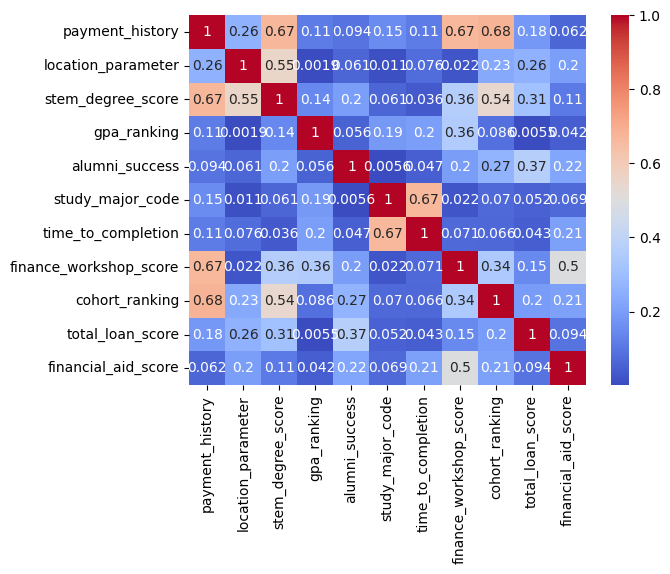

<Figure size 2000x4000 with 0 Axes>

[]

In [ ]:
#perform.

#########################################
# SANDBOX...investigating features.
#########################################

#  Look for highly correlated data;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(40)

print("Plot after re-sizing: ")
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(high_corr)

# df.drop(columns=to_drop, inplace=True)

In [ ]:
#perform.
#########################################
# SANDBOX...investigating features.
#########################################
# Check Feature Importance:

# Train RandomForest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Drop features with low importance
threshold = 0.1
to_keep = feature_importances[feature_importances['Importance'] > threshold]['Feature']

display(to_keep.head())

df_reduced = loans_df[to_keep]
display(df_reduced.head())

# # bar chart using the Seaborn library to show importance:
# import seaborn as sns
# sns.barplot(x=solver_list, y=scores).set_title("Feature Importance")

# # increase font size
# ax = sns.barplot(x=solver_list, y=scores)
# ax.set_title("Accuracy with Unscaled Features", fontsize = 20)

,Feature
10,financial_aid_score
9,total_loan_score
1,location_parameter


,financial_aid_score,total_loan_score,location_parameter
0,9.4,0.56,0.70
1,9.8,0.68,0.88
2,9.8,0.65,0.76
3,9.8,0.58,0.28
4,9.4,0.56,0.70


In [ ]:
# perform.  thoughts to improve performance of model...
# K-Fold Cross-Validation: Use cross-validation to ensure your model generalizes well to unseen data




### Step 3: Split the features and target sets into training and testing datasets.


In [ ]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [ ]:
# Create a StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit/train the scaler to the features training dataset
scaler.fit(X_train)

# Scale the X train and X test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# overfit??  training score of 1.0
# Spot check with Random Forest model:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1,
				n_estimators=500).fit(X_train_scaled, y_train)
# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.805


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [ ]:
# Define the the number of inputs (features) to the model
feature_count = len(X.columns)
display(X.columns)

# Review the number of features
print("number of features: " , feature_count)

Index(['payment_history', 'location_parameter', 'stem_degree_score',
       'gpa_ranking', 'alumni_success', 'study_major_code',
       'time_to_completion', 'finance_workshop_score', 'cohort_ranking',
       'total_loan_score', 'financial_aid_score'],
      dtype='object')

number of features:  11


In [ ]:
# Define the model

# Define the number of neurons/hidden nodes for the first hidden layer
hidden_nodes_layer_1 = 32 # up from 10

# Define the number of neurons/hidden nodes for the second hidden layer
hidden_nodes_layer_2 = 16 # up from 5

# Define the number of neurons in the output layer
neurons_output_layer = 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Create the Keras Sequential model instance
nn_model = Sequential()

# Add the first Dense, including the input layer
nn_model.add(Dense(units=hidden_nodes_layer_1, activation="relu", input_dim = feature_count))

# Add the second Dense/hidden layer
nn_model.add(Dense(units=hidden_nodes_layer_2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display the Sequential model summary/Check the structure of the model
nn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [ ]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit/Train the model using 50 epochs and the training data
# The epoch runs are all Training...see these accuracy values for overfit tendencies
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25) #, validation_split=0.2

# originally tried 50, then 100 epochs, but determined from Graph that 25 was more optimal.

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 0.4445
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7980 - loss: 0.4339
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.4318
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7933 - loss: 0.4404
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8140 - loss: 0.4200
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7920 - loss: 0.4488
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8201 - loss: 0.4261
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7933 - loss: 0.4443
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8081 - loss: 0.4277
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8152 - loss: 0.4194
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7970 - loss: 0.4479
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - lo

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 23ms/step - accuracy: 0.7600 - loss: 0.4977
Loss: 0.49772870540618896, Accuracy: 0.7599999904632568


In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)
# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Inspect history df
display(history_df.head())

,accuracy,loss
1,0.622185,0.644391
2,0.716430,0.575804
3,0.737281,0.536547
4,0.749792,0.517595
5,0.757298,0.506790


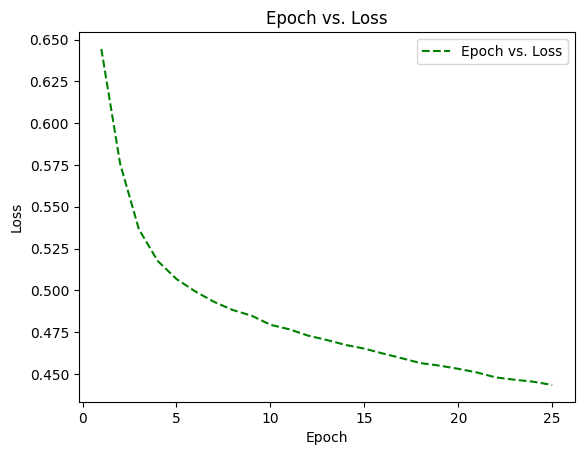

In [ ]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_df.index, history_df['loss'], label='Epoch vs. Loss', color='g', linestyle='--')
plt.title('Epoch vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# simple dataframe plot:
# history_df.plot(y="loss")

Text(0.5, 0, 'Epoch')

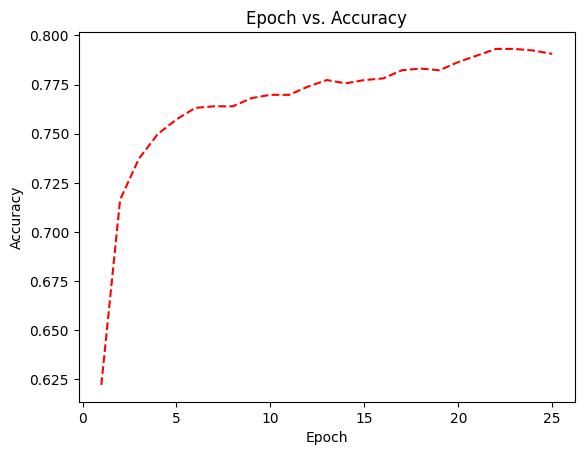

In [ ]:
# Plot the accuracy
plt.plot(history_df.index, history_df['accuracy'], label='Epoch vs. Accuracy', color='r', linestyle='--')
plt.title('Epoch vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# simple dataframe plot:
# history_df.plot(y="accuracy")

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')#  , force_remount=True

# List the contents of My Drive
print(os.listdir('/content/drive/My Drive/saved_models'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['student_loans_perf.keras', 'student_loans.keras']


In [ ]:
from pathlib import Path
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_perf.keras')

# Export your model to a keras file
nn_model.save(file_path)
print(os.listdir('/content/drive/My Drive/saved_models'))

['student_loans_perf.keras', 'student_loans.keras']


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [ ]:
# Import the required libraries
import tensorflow as tf

print(os.listdir('/content/drive/My Drive/saved_models'))
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_perf.keras')

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

['student_loans_perf.keras', 'student_loans.keras']


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [ ]:
# Make predictions with the test data
# predictions = nn_model.predict(X_test,verbose=2)
predictions = nn_imported.predict(X_test,verbose=2)

# Display a sample of the predictions
predictions[:10]

13/13 - 0s - 11ms/step


array([[9.9989879e-01],
       [1.2989329e-02],
       [9.9573547e-01],
       [3.2333346e-04],
       [9.9877405e-01],
       [1.2823344e-03],
       [9.9851102e-01],
       [1.7255616e-05],
       [1.8603516e-05],
       [1.0096206e-03]], dtype=float32)

In [ ]:
# Save the predictions to a DataFrame and round the predictions to binary results
df_preds = pd.DataFrame(predictions, columns=['Prediction']) #convert numpy array to DataFrame.
df_preds_binary = df_preds.applymap(lambda x: 1 if x > 0.5 else 0)

display(df_preds_binary.value_counts())
display(df_preds_binary.head())
display(df_preds_binary.tail())

<ipython-input-104-bcfd8d9954d7>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_preds_binary = df_preds.applymap(lambda x: 1 if x > 0.5 else 0)


,count
Prediction,
0,284
1,116


,Prediction
0,1
1,0
2,1
3,0
4,1


,Prediction
395,0
396,0
397,0
398,1
399,1


### Step 4: Display a classification report with the y test data and predictions

In [ ]:
# Print the classification report with the y test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, df_preds_binary))

              precision    recall  f1-score   support

           0       0.53      0.77      0.63       194
           1       0.62      0.35      0.45       206

    accuracy                           0.56       400
   macro avg       0.57      0.56      0.54       400
weighted avg       0.58      0.56      0.53       400



In [ ]:
# Evalute the model using test data: nn_model.evaluate(X_test_scaled , y_test, verbose=2)

#    13/13 - 0s - 15ms/step - accuracy: 0.7625 - loss: 0.5198
#    Loss: 0.519763708114624, Accuracy: 0.762499988079071


# Make predictions with the test data
# Save the predictions to a DataFrame and round the predictions to binary results
# Print the classification report with the y_test data and binary predictions

#               precision    recall  f1-score   support

#            0       0.48      0.84      0.61       188
#            1       0.59      0.21      0.31       212

#     accuracy                           0.51       400
#    macro avg       0.54      0.52      0.46       400
# weighted avg       0.54      0.51      0.45       400



#  with performance improvements:
#               precision    recall  f1-score   support

#            0       0.47      0.98      0.64       188
#            1       0.67      0.04      0.07       212

#     accuracy                           0.48       400
#    macro avg       0.57      0.51      0.36       400
# weighted avg       0.58      0.48      0.34       400


#  final run:
#               precision    recall  f1-score   support

#            0       0.53      0.77      0.63       194
#            1       0.62      0.35      0.45       206

#     accuracy                           0.56       400
#    macro avg       0.57      0.56      0.54       400
# weighted avg       0.58      0.56      0.53       400


# Overall Performance is not good: Accuracy (0.56) is only slightly above random guessing (50%).

# The target/predicted column is "Credit Ranking": 0 meaning 'bad credit risk', 1 meaning 'good credit risk'.

# Here are the features considered:
#       'payment_history', 'location_parameter', 'stem_degree_score',
#       'gpa_ranking', 'alumni_success', 'study_major_code', 'time_to_completion',
#       'finance_workshop_score', 'cohort_ranking', 'total_loan_score', 'financial_aid_score'

# Class 0: "bad credit risk"
# The model performs better at identifying class 0 instances, with high recall but lower precision.
# High Recall for Class 0: The model is good at identifying most of the actual class 0 instances but has a moderate number of false positives.
    # Precision (0.53): Out of all instances predicted as class 0, 53% were actually class 0.
    # Recall (0.77): Out of all actual instances of class 0, 77% were correctly predicted.
    # F1-Score (0.63): Harmonic mean of precision and recall for class 1, balancing the two metrics.
    # Support (194): # of instances of class in the dataset.

#  --> With a recall of 77%, the model could be used to idenfity HIGH RISK candidates with some certainty, and
#        make recommendations to either reject or more closely scrutinize these applications.

# Class 1 "good credit risk"
# The model struggles more with class 1, having higher precision but very low recall.
# Low Recall for Class 1 means the model misses a significant number of actual class 1 instances,
#   indicating it might be biased towards predicting class 0.

        # Precision (0.62): Out of all instances predicted as class 1, 62% were actually class 1.
        # Recall (0.35): Out of all actual instances of class 1, 35% were correctly predicted.
        # F1-Score (0.45): Harmonic mean of precision and recall for class 1.
        # Support (206):  # of instances of class in the dataset.

# -->  The model is not great at identifying 'good risks'.  It would not be recommended to use it as a
#        recommendation engine to identify 'good' risks.



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:


1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**



In [ ]:
# NOTES for README:

# Create a deep neural network using Tensorflow's Keras model to predict student loan repayment
# CSV file contains information about previous student loan recipients

#   * Prepare the data for use on a neural network model.
#   * Compile and evaluate a model using a neural network.
#   * Predict loan repayment success with the neural network model
#   * Discuss recommendation system for student loans

# Prepare the data, including splitting and scaling.  The target dataset: “credit_ranking” column

    #   Define, create and compile the Neural Network model.
    #   Define the the number of inputs (features) to the model
    #   Define the number of neurons/hidden nodes
    #   Create the Keras Sequential model instance
    #   Add input layers and output layer
    #   Display the Sequential model summary and inspect the structure of the model
    #   Compile the Sequential model
    #   Fit the model using 50 epochs and the training data